<a href="https://colab.research.google.com/github/LIvanoff/Big-Data-analysis-technologies-and-tools/blob/main/pr5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Задача 1

Найти данные для классификации. Данные в группе повторяться не
должны. Предобработать данные, если это необходимо

В качестве данных были взят датасет MNSIT, состоящий из рукописных цифр, размер датасета состовляет 70000 изображений.

In [ ]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

Для дальнешей работы с датасетом нужно понизить размерность изображений с 28*28=784 до двух признаков. Для этого воспользуемся методом понижения размерности t-SNE.

In [ ]:
model = TSNE(n_components=2, n_iter=250, random_state=42)
TSNE_features = model.fit_transform(X)

mnist = pd.DataFrame()

mnist['x1'] = TSNE_features[:,0]
mnist['x2'] = TSNE_features[:,1]

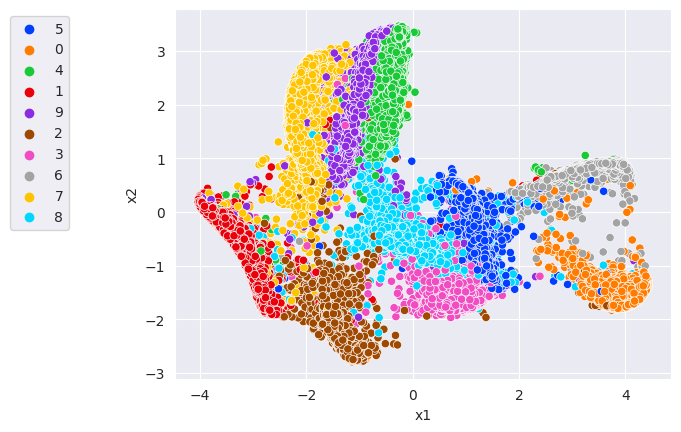

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x='x1', y='x2', hue=y ,data=mnist, palette='bright')
plt.legend(bbox_to_anchor=(-0.2, 1))
plt.show()

## Задача 2

Изобразить гистограмму, которая показывает баланс классов. Сделать
выводы.

(array([6313., 6903., 6824., 7877., 6958., 6990., 7141., 6876., 7293.,
        6825.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

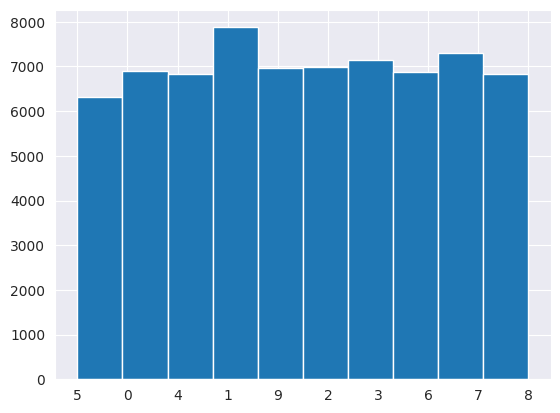

In [ ]:
plt.hist(y, bins=10)

В данном случае наши данные распределены практически равномерны, не считая единицы превосходства по количеству единицы и недобора цифры пять.

## Задача 3

Разбить выборку на тренировочную и тестовую. Тренировочная для
обучения модели, тестовая для проверки ее качества.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist, y, stratify=y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((56000, 2), (14000, 2))

## Задача 4

Применить алгоритмы классификации: логистическая регрессия, SVM,
KNN. Построить матрицу ошибок по результатам работы моделей
(использовать confusion_matrix из sklearn.metrics)

### Логистическая регрессия

In [ ]:
clf = LogisticRegression(random_state=42, max_iter=1000, penalty='l2', solver='liblinear').fit(X_train, y_train)
pred_log = clf.predict(X_test)
print(classification_report(pred_log, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1385
           1       0.99      0.96      0.98      1623
           2       0.94      0.99      0.96      1323
           3       0.96      0.74      0.84      1845
           4       0.72      0.60      0.66      1627
           5       0.73      0.94      0.82       981
           6       0.96      0.99      0.98      1344
           7       0.93      0.95      0.94      1423
           8       0.87      0.89      0.88      1333
           9       0.52      0.65      0.58      1116

    accuracy                           0.86     14000
   macro avg       0.86      0.87      0.86     14000
weighted avg       0.87      0.86      0.87     14000



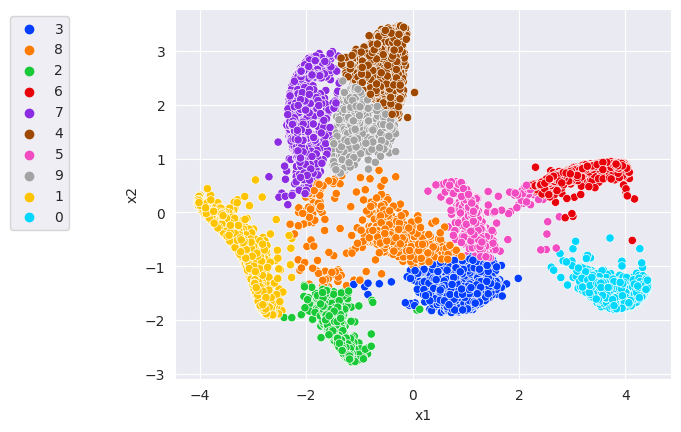

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x='x1', y='x2', hue=pred_log ,data=X_test, palette='bright')
plt.legend(bbox_to_anchor=(-0.2, 1))
plt.show()

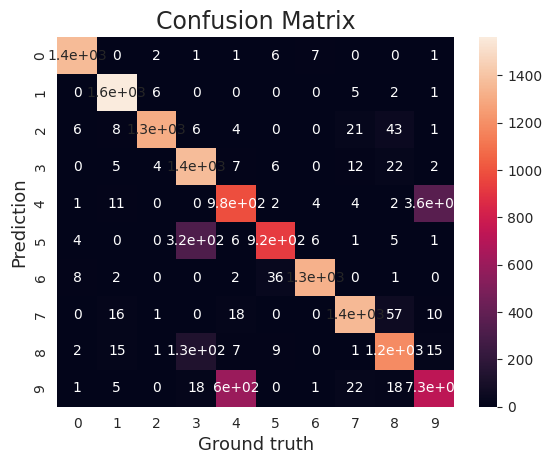

In [ ]:
cm = confusion_matrix(y_test,pred_log)

sns.heatmap(cm,
            annot=True,
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Ground truth',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### kNN

In [ ]:
parameters = {'n_neighbors': np.arange(1,10)}
knn_cv = KNeighborsClassifier()
clf = GridSearchCV(knn_cv, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'n_neighbors': 9}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(classification_report(pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1388
           1       0.99      0.96      0.98      1615
           2       0.96      0.99      0.97      1357
           3       0.94      0.96      0.95      1400
           4       0.92      0.94      0.93      1343
           5       0.97      0.96      0.96      1272
           6       0.99      0.98      0.99      1384
           7       0.98      0.94      0.96      1516
           8       0.92      0.95      0.93      1328
           9       0.92      0.92      0.92      1397

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



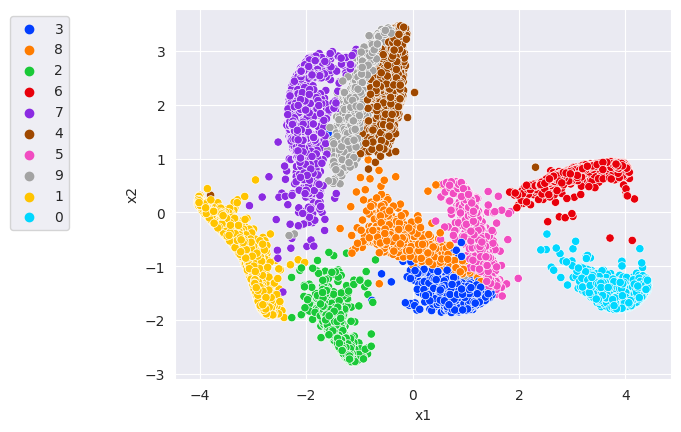

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x='x1', y='x2', hue=pred_knn ,data=X_test, palette='bright')
plt.legend(bbox_to_anchor=(-0.2, 1))
plt.show()

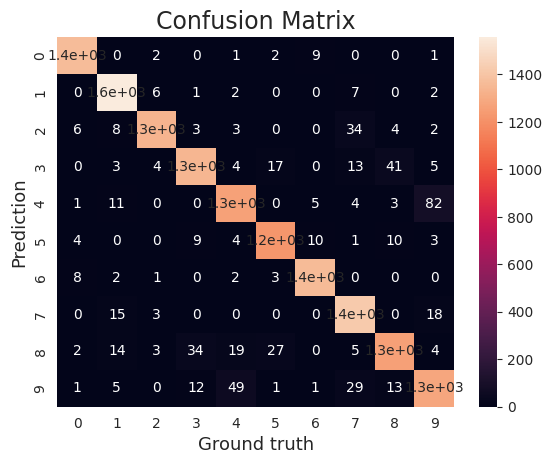

In [ ]:
cm = confusion_matrix(y_test,pred_knn)

sns.heatmap(cm,
            annot=True,
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Ground truth',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### SVM

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C': np.arange(1,10)}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=9)

In [ ]:
clf.best_params_

{'C': 9, 'kernel': 'rbf'}

In [ ]:
svm = SVC(C=9, kernel='rbf').fit(X_train, y_train)
pred_svm = svm.predict(X_test)
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1389
           1       0.99      0.96      0.98      1617
           2       0.96      0.98      0.97      1364
           3       0.94      0.96      0.95      1394
           4       0.91      0.94      0.93      1327
           5       0.97      0.96      0.96      1283
           6       0.99      0.98      0.98      1386
           7       0.97      0.94      0.96      1497
           8       0.92      0.95      0.93      1315
           9       0.92      0.90      0.91      1428

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



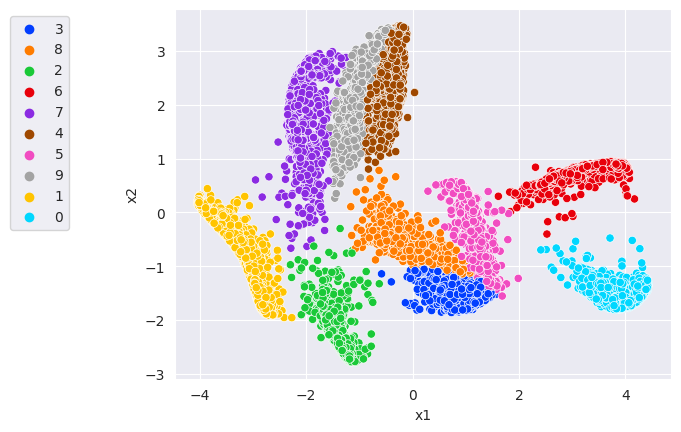

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x='x1', y='x2', hue=pred_svm ,data=X_test, palette='bright')
plt.legend(bbox_to_anchor=(-0.2, 1))
plt.show()

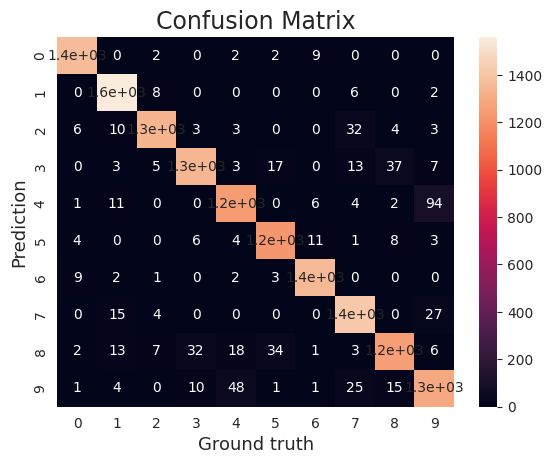

In [ ]:
cm = confusion_matrix(y_test,pred_svm)

sns.heatmap(cm,
            annot=True,
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Ground truth',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Задача 5

Сравнить результаты классификации, используя accuracy, precision,
recall и f1-меру (можно использовать classification_report из
sklearn.metrics). Сделать выводы.

In [ ]:
print(f' Метрики по Логистическая регрессия: \n{classification_report(pred_log, y_test)}')
print(f' Метрики по SVM: \n{classification_report(pred_svm, y_test)}')
print(f' Метрики по kNN: \n{classification_report(pred_knn, y_test)}')

 Метрики по Логистическая регрессия: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1385
           1       0.99      0.96      0.98      1623
           2       0.94      0.99      0.96      1323
           3       0.96      0.74      0.84      1845
           4       0.72      0.60      0.66      1627
           5       0.73      0.94      0.82       981
           6       0.96      0.99      0.98      1344
           7       0.93      0.95      0.94      1423
           8       0.87      0.89      0.88      1333
           9       0.52      0.65      0.58      1116

    accuracy                           0.86     14000
   macro avg       0.86      0.87      0.86     14000
weighted avg       0.87      0.86      0.87     14000

 Метрики по SVM: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1389
           1       0.99      0.96      0.98      1617
           2       0.9

In [ ]:
print(f'Логистическая регрессия: {accuracy_score(pred_log, y_test)}')
print(f'SVM: {accuracy_score(pred_svm, y_test)}')
print(f'kNN: {accuracy_score(pred_knn, y_test)}')

Логистическая регрессия: 0.8645
SVM: 0.956
kNN: 0.9572857142857143
